# Generate word clouds from EDS 220 survey responses
## Fall 2021

In [1]:
# import appropriate modules
import pandas as pd
import numpy as np
from os import path
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from io import BytesIO
import requests
figsize = 15
year = '2021'

In [2]:
# Read in survey data
df = pd.read_csv('surveyquestions_EDS220_Fall' + year + '.csv')

In [4]:
# Define column names
df.columns = ['timestamp','data_interested', 'dataprods_excited','level_familiar', 'dataprods_used', 'most_interested', 'most_worried','better_at','missing_question'] # clean column names
df.head()

,timestamp,data_interested,dataprods_excited,level_familiar,dataprods_used,most_interested,most_worried,better_at,missing_question
0,2021/09/22 8:27:49 AM MDT,Satellite-based: land;Satellite-based: ocean;I...,On an internship I used humidity/temperature d...,Novice: little to no experience,NaN,Environmental justice applications of EJ. Whet...,Python! Feeling cozy in R so far this summer. ...,Looking at datasets and being able to talk abo...,NaN
1,2021/09/22 3:10:34 PM MDT,Satellite-based: land,landsat 7&8 eli and oli harmonized; its a grea...,Intermediate: worked with multiple data types ...,"landsat 7&8 imagery , sentenial 2 imagery, net...",Im excited for the incorporation of jupyter no...,python! I'm not as well versed in it as I am w...,understanding how to calculate basic indexes o...,"Nope! I'm excited for this class, I've been gr..."
2,2021/09/22 3:32:58 PM MDT,Satellite-based: land;Other remotely sensed (a...,eBird - it's so cool the amount and specificit...,Intermediate: worked with multiple data types ...,NaN,Learning more about how satellite data is coll...,NaN,Integrating different datasets in an environme...,NaN
3,2021/09/22 5:03:00 PM MDT,Satellite-based: land;Satellite-based: ocean;O...,"Recently I've been interested in land use, par...",Intermediate: familiar with one or two datasets,In undergrad I worked with remote sensing and ...,I've really fallen in love with the programmin...,Not having remote sensing experience fresh in ...,Python and general knowledge of remote sensing...,Looks good to me!
4,2021/09/22 6:41:38 PM MDT,Satellite-based: land;Other remotely sensed (a...,NaN,Intermediate: worked with multiple data types ...,"general spatial data (incl raster) in ArcGIS, ...",everything,organization,knowing the options for converting spatial dat...,NaN


In [6]:
# Concatenate responses
dataprods_excited = " ".join(df['dataprods_excited'].dropna().to_list())
dataprods_used = " ".join(df['dataprods_used'].dropna().to_list())
most_interested_text = " ".join(df['most_interested'].dropna().to_list())
most_worried_text = " ".join(df['most_worried'].dropna().to_list())
better_at_text = " ".join(df['better_at'].dropna().to_list())

In [7]:
# Make circular mask
url = 'https://raw.githubusercontent.com/environmental-data-science/ESM_203/master/'
response = requests.get(url + 'data/circle_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))


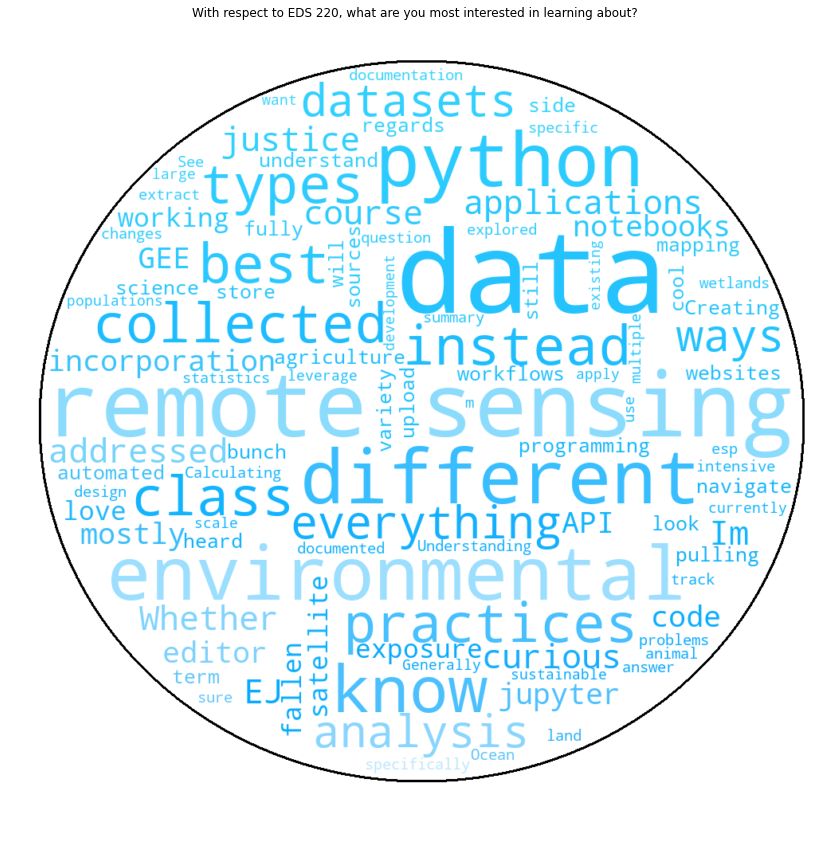

In [12]:
# Plot word cloud: most interested in learning
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["interested", "learning",'excited','really','getting','learn','used','using']) # remove question words from answers.

# Generate the wordcloud
wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(most_interested_text)

# Use the mask for determining word colors
image_colors = ImageColorGenerator(mask)

# Make the figure
plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('With respect to EDS 220, what are you most interested in learning about?')
plt.axis("off")
plt.show()

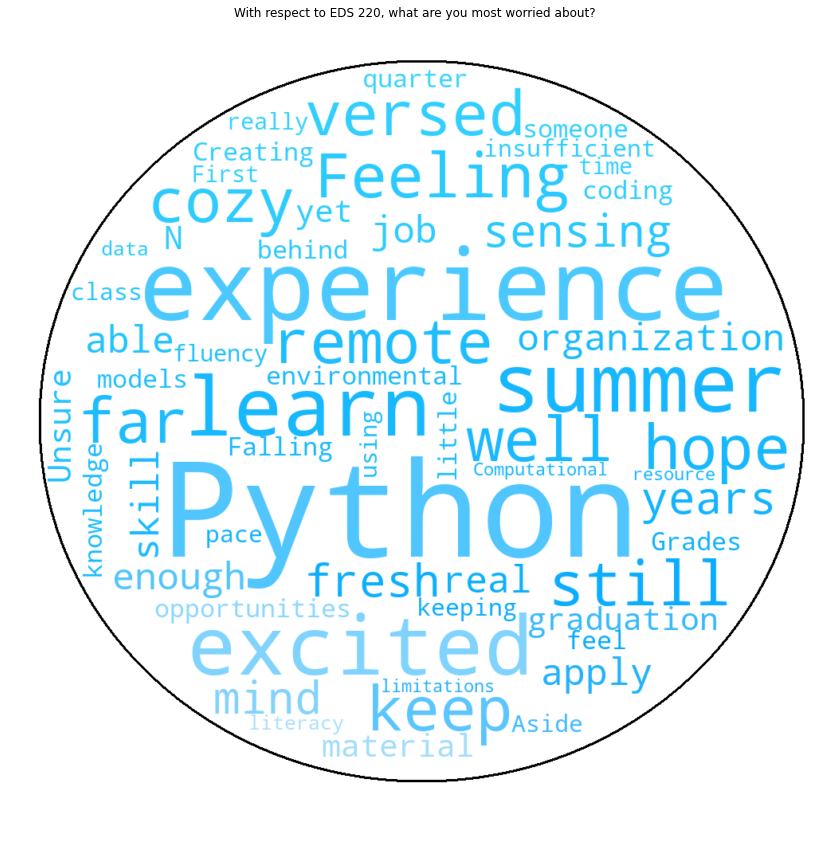

In [26]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["worried", "learning", "course", "topic", "lack", "will", "much"]) # Remove question words.

response = requests.get(url + 'data/circle_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

# Generate the wordcloud
wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(most_worried_text)

# Use the mask for determining word colors
image_colors = ImageColorGenerator(mask)

# Make the figure
plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('With respect to EDS 220, what are you most worried about?')
plt.axis("off")
plt.show()

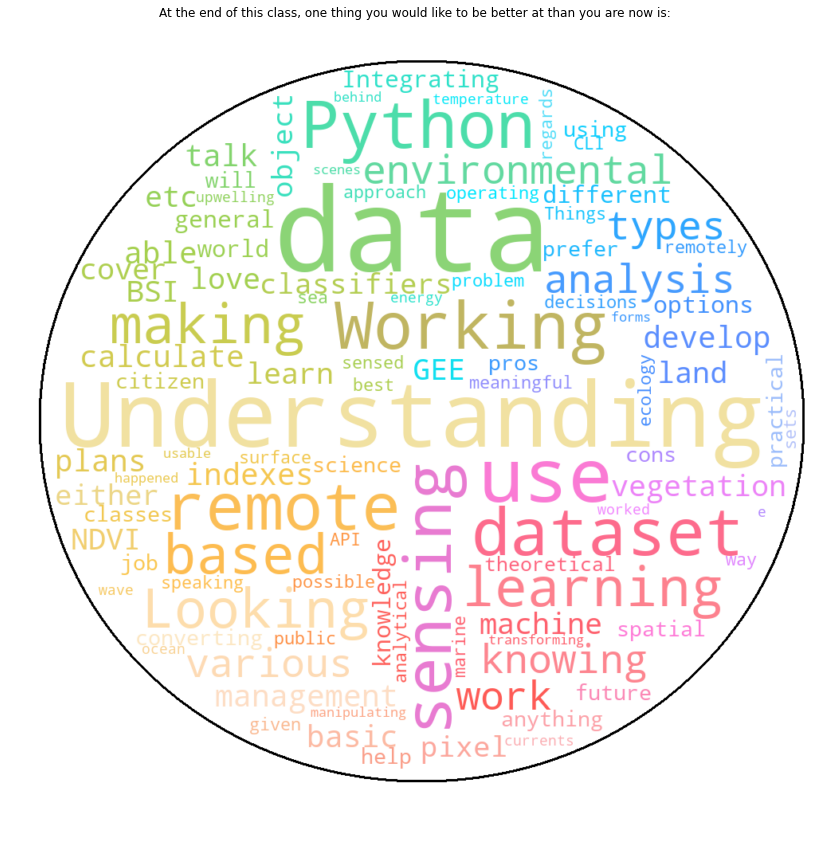

In [20]:
max_words = 100
stopwords = set(STOPWORDS)

stopwords.update(["better"])

response = requests.get(url + 'data/better_mask.png')
mask = np.array(Image.open(BytesIO(response.content)))

wordcloud = WordCloud(
    max_words=max_words,
    mask=mask,
    contour_width=3,
    stopwords=stopwords,
    background_color="white").generate(better_at_text)

image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[figsize,figsize])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.title('At the end of this class, one thing you would like to be better at than you are now is:')
plt.axis("off")
plt.show()